In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



In [138]:
df = pd.read_csv("C:/Users/user/Desktop/loan_data_set.csv")
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
96,LP001327,Female,Yes,0,Graduate,No,2484,2302.0,137.0,360.0,1.0,Semiurban,Y
97,LP001333,Male,Yes,0,Graduate,No,1977,997.0,50.0,360.0,1.0,Semiurban,Y
98,LP001334,Male,Yes,0,Not Graduate,No,4188,0.0,115.0,180.0,1.0,Semiurban,Y


In [139]:
df.shape


(614, 13)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [141]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [142]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [144]:
df.dropna(inplace=True)

In [145]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [146]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [147]:
df.shape

(542, 13)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

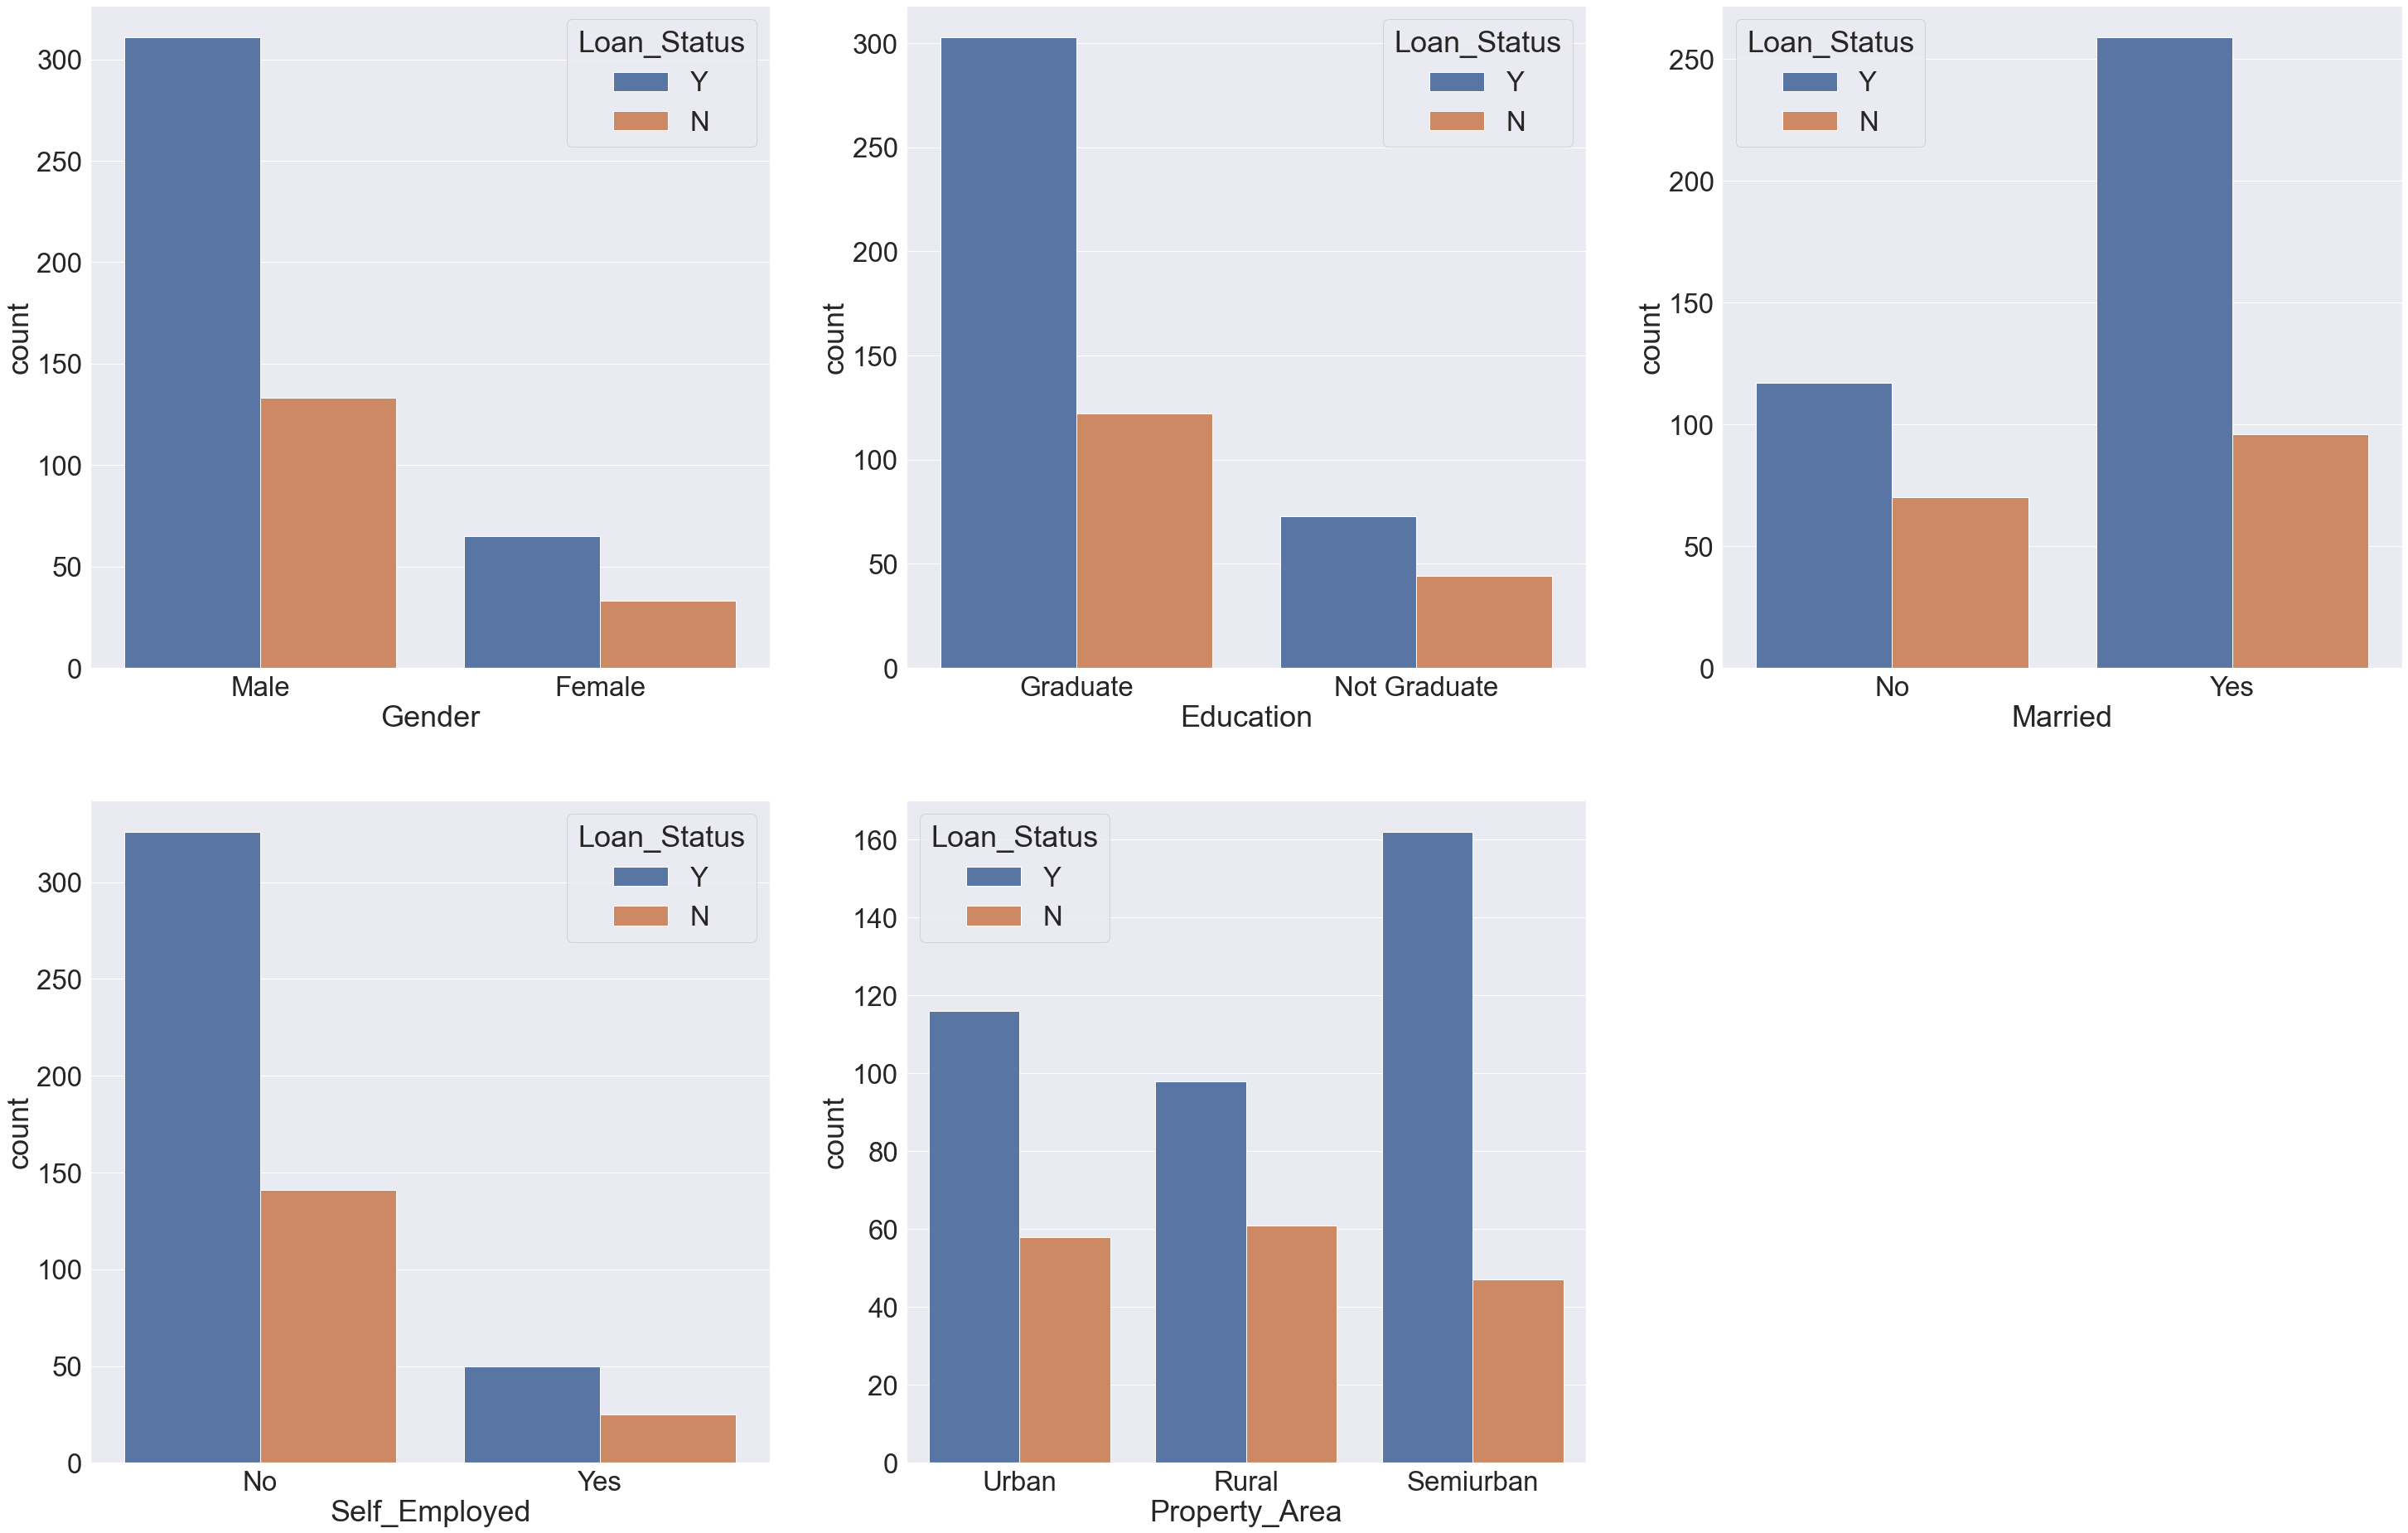

In [148]:
plt.figure(figsize=(50,50))
sns.set(font_scale=3)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(df['Education'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(df['Married'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])










In [149]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [150]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [151]:
df['Gender'].replace('Male',1,inplace=True)
df['Gender'].replace('Female',0,inplace=True)

In [152]:
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [153]:
df.Married=df.Married.map({'Yes':1 ,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [154]:
df.Dependents=df.Dependents.map({'0':0 ,'1':1, '2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [155]:
df.Education=df.Education.map({'Graduate':1 ,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [156]:
df.Self_Employed=df.Self_Employed.map({'Yes':1 ,'No':0})
df['Self_Employed'].value_counts()


0    467
1     75
Name: Self_Employed, dtype: int64

In [157]:
df.Property_Area=df.Property_Area.map({'Urban':2 ,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()


1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [158]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [159]:
df['Credit_History'].value_counts()

1.000000    425
0.000000     74
0.842199     43
Name: Credit_History, dtype: int64

In [160]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


In [167]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [168]:
x = df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [169]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [170]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)

lr_prediction = model.predict(x_test)
print('Decision Tree accuracy = ',metrics.accuracy_score(lr_prediction,y_test))

Decision Tree accuracy =  0.7116564417177914


In [69]:
print("y_predicted",lr_prediction)
print("y_tested",y_test)

y_predicted [0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 0 1 0
 1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0]
y_tested [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [126]:
x = df.iloc[1:542,1:12].values
y=df.iloc[1:542,12].values

In [127]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [171]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
rc_prediction = model.predict(x_test)
print('Random Forest accuracy = ',metrics.accuracy_score(rc_prediction,y_test))

Random Forest accuracy =  0.7730061349693251


In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [84]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [124]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [86]:
pred_cv = model.predict(x_test)

In [87]:
accuracy_score(y_test, pred_cv)

0.7852760736196319

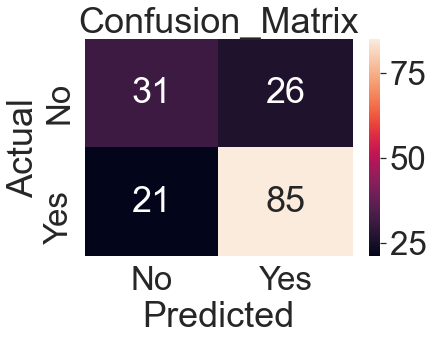

In [177]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, lr_prediction)
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax, fmt='g');

ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion_Matrix');
ax.xaxis.set_ticklabels(['No','Yes']); 
ax.yaxis.set_ticklabels(['No','Yes']);

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_cv))

              precision    recall  f1-score   support

           0       0.92      0.42      0.58        57
           1       0.76      0.98      0.86       106

    accuracy                           0.79       163
   macro avg       0.84      0.70      0.72       163
weighted avg       0.82      0.79      0.76       163



In [178]:
pred_test = model.predict(x_test)

In [179]:
pred_test[:50]

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0], dtype=int64)

In [180]:
submission = pd.read_csv("C:/Users/user/Desktop/submission.csv")

In [181]:
test = pd.read_csv("C:/Users/user/Desktop/test.csv")

In [182]:
test_original = test.copy()

In [183]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test_original['Loan_ID']

In [187]:
submission['Loan_Status'].replace(1,'Y',inplace=True)
submission['Loan_Status'].replace(0,'N',inplace=True)

In [188]:
submission.head()

,Loan_ID,Loan_Status
0,LP001002,Y
1,LP001003,N
2,LP001005,N
3,LP001006,Y
4,LP001008,Y
